In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
IMG_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 30
CHANNELS=3

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Food Classification",
    shuffle=True,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 6269 files belonging to 20 classes.


In [6]:
class_names = dataset.class_names
class_names

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

In [7]:
len(dataset)

196

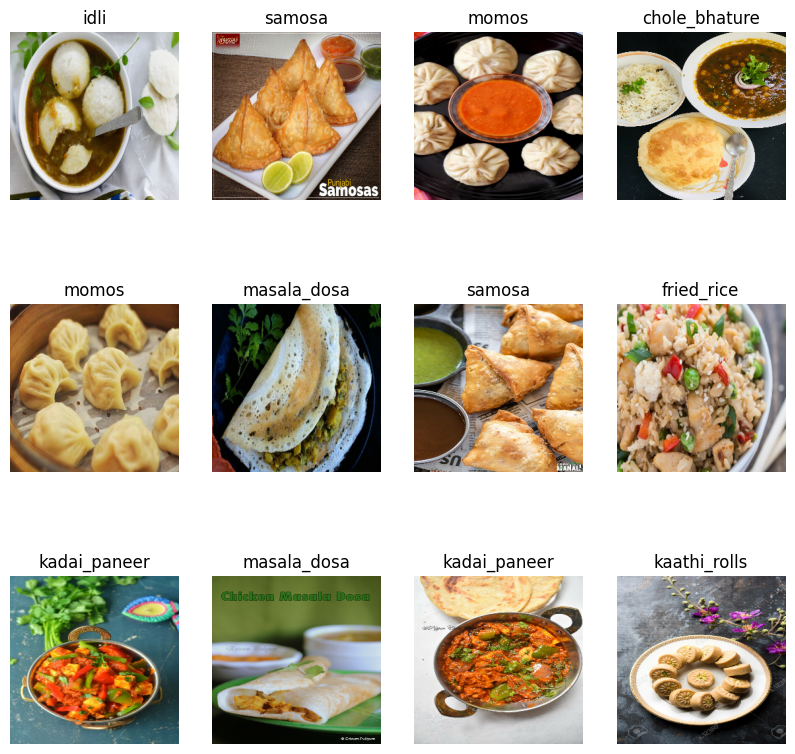

In [8]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [9]:
train_size = 0.8
len(dataset)*0.8

156.8

In [10]:
train_ds = dataset.take(156) # first 54
len(train_ds)

156

In [11]:
test = dataset.skip(156)  # skip first 54 batches
len(test)

40

In [12]:
valid_ds = test.take(20)
len(valid_ds)
test_ds = test.skip(20)
len(test_ds)

20

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
valid_ds = valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [16]:
n_classes = len(class_names)
n_classes

20

In [102]:
input_shape = (32,256,256,3)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape = input_shape)

In [99]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_90 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_90 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_91 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_91 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                               

In [104]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [105]:
history = model.fit(
    train_ds,
    epochs=50,
    batch_size=32,
    verbose=1,
    validation_data=valid_ds
)

Epoch 1/50
156/156 [==============================] - 13s 65ms/step - loss: 2.8488 - accuracy: 0.1000 - val_loss: 2.7134 - val_accuracy: 0.1500
Epoch 2/50
156/156 [==============================] - 9s 59ms/step - loss: 2.7016 - accuracy: 0.1322 - val_loss: 2.6482 - val_accuracy: 0.1359
Epoch 3/50
156/156 [==============================] - 9s 60ms/step - loss: 2.6669 - accuracy: 0.1402 - val_loss: 2.5943 - val_accuracy: 0.1750
Epoch 4/50
156/156 [==============================] - 9s 61ms/step - loss: 2.5981 - accuracy: 0.1713 - val_loss: 2.5472 - val_accuracy: 0.1891
Epoch 5/50
156/156 [==============================] - 10s 62ms/step - loss: 2.5090 - accuracy: 0.2043 - val_loss: 2.4783 - val_accuracy: 0.2406
Epoch 6/50
156/156 [==============================] - 9s 61ms/step - loss: 2.4211 - accuracy: 0.2232 - val_loss: 2.3602 - val_accuracy: 0.2641
Epoch 7/50
156/156 [==============================] - 10s 62ms/step - loss: 2.3178 - accuracy: 0.2700 - val_loss: 2.3210 - val_accuracy: 0.2

In [106]:
scores = model.evaluate(test_ds)

20/20 [==============================] - 1s 26ms/step - loss: 1.4658 - accuracy: 0.5683


In [107]:
scores

[1.4658162593841553, 0.5682888627052307]

In [108]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

1/1 [==============================] - 0s 166ms/step
burger


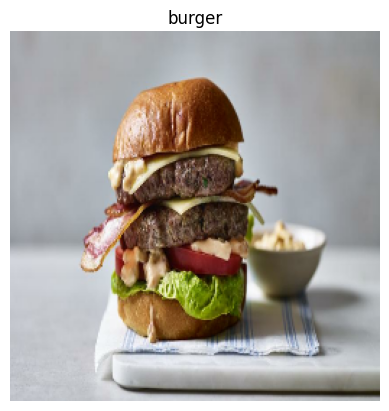

In [109]:
import numpy as np
for image_batch, label_batch in test_ds.take(1):

    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')
    batch_pred = model.predict(image_batch)
    print(class_names[np.argmax(batch_pred[0])])

In [110]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100 * (np.max(predictions)), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 99ms/step
Actual: dhokla
Predicted: dhokla
Confidence: 72.85
1/1 [==============================] - 0s 22ms/step
Actual: samosa
Predicted: burger
Confidence: 47.28
1/1 [==============================] - 0s 20ms/step
Actual: samosa
Predicted: burger
Confidence: 25.48
1/1 [==============================] - 0s 18ms/step
Actual: pav_bhaji
Predicted: pav_bhaji
Confidence: 77.72
1/1 [==============================] - 0s 20ms/step
Actual: fried_rice
Predicted: fried_rice
Confidence: 90.89
1/1 [==============================] - 0s 21ms/step
Actual: pakode
Predicted: pav_bhaji
Confidence: 59.49
1/1 [==============================] - 0s 21ms/step
Actual: momos
Predicted: momos
Confidence: 99.98
1/1 [==============================] - 0s 18ms/step
Actual: kulfi
Predicted: dhokla
Confidence: 83.13
1/1 [==============================] - 0s 18ms/step
Actual: kulfi
Predicted: kulfi
Confidence: 24.58


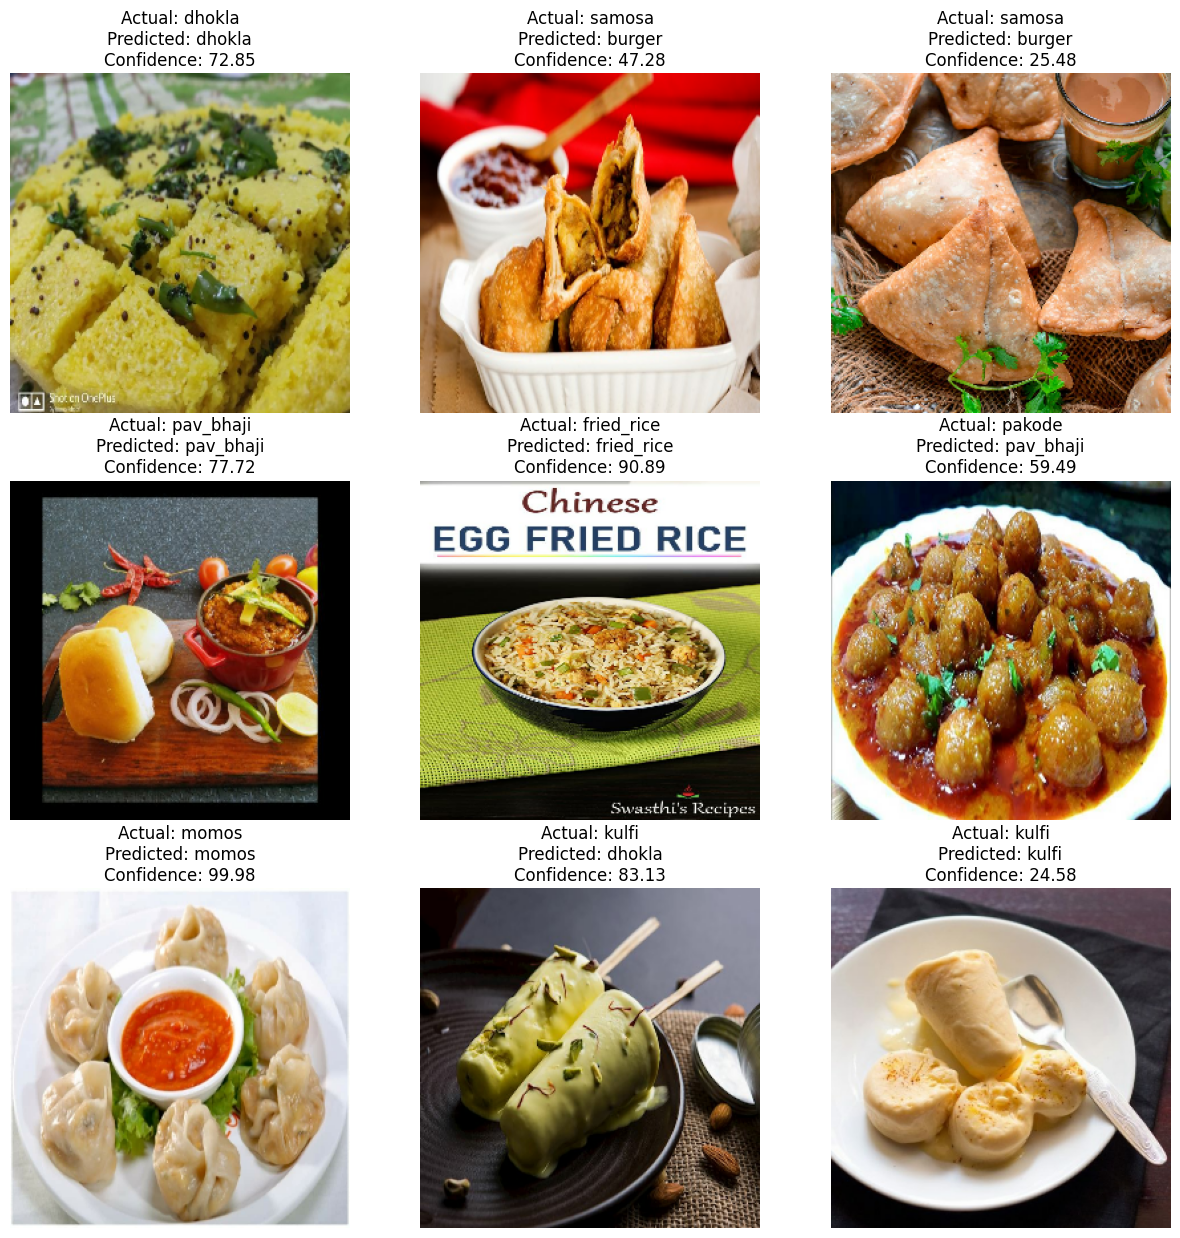

In [111]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        print(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}")
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}")
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.axis('off')
